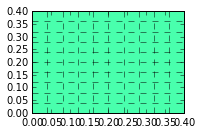

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###########################
## Set Initial Condition ##
##
# dimensions in x, y and z directions (dx, dy, dz),
dx = 0.4
dy = 0.4
dz = 0.01 # plate thickness (m.)

# number of divisions in each direction (nx, ny)
nx = 11
ny = 11

# the cell dimensions (cx, cy)
cx = dx/nx
cy = dy/ny

# The north boundary is maintained at a temperature of 100°C
tInitN = 100 

# The west boundary receives a steady heat flux of 500 kW/m^2
hFluxW = 500 

# The thermal conductivity of plate material are k1 = 1000 W/m.K. , k2 = 2000 W/m.K. 
k = np.zeros((ny, nx)) 
k[:,:]=1000

##################
## Create node ##
##
u = np.zeros((ny, nx)) 
un = np.zeros((ny, nx)) 
            
x = np.linspace(0, dx, nx)       ## Line space from 0 to dx split in nx spaces.
y = np.linspace(0, dy, ny)
X,Y = np.meshgrid(x,y)

####################################
## Plot the plate material layout ##
##
plt.subplot(221)
plt.contourf(X,Y, k[:])
plt.plot(X,Y, 'k--', alpha=0.5)
plt.plot(X.T,Y.T, 'k--', alpha=0.5)
plt.show()


In [2]:
def sFVM2DSteady(ns):
    u = np.zeros((ny, nx))
    
    for s in range(ns):
        un=u.copy()

        for j in range(ny):
            for i in range(nx):

                ### Check  Condition 
                # Cell(0,0) buttom-left conner
                if  (j == 0) & (i == 0):
                    aW = 0 # (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = 0 #(k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    bW = hFluxW*1000*(cy*dz)
                    bS = 0
                    sP = 0
                    
                    sU = bW + bS
                    aP = aW+ aE + aS + aN - sP
                    
                    u[j,i] =  (aN*(un[j,i+1]+un[j+1,i])+sU)/(aP) 

                # Cell(ny,0) top-left conner
                if  (j == ny-1) & (i == 0):
                    aW = 0 # (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = 0 #(k[j+1,i]/cx)*(cy*dz)
                    
                    bW = hFluxW*1000*(cy*dz)
                    bN = 2*(k[j,i]/cy)*(cx*dz)*tInitN
                    sP = -(2*(k[j,i]/cy)*(cx*dz))

                    sU = bW + bN
                    aP = aW+ aE + aS + aN - sP
                    
                    u[j,i] = (aS*(un[j,i+1]+un[j-1,i])+sU)/(aP)

                # Cell(0,nx) buttom-right conner
                if  (j == 0) & (i == nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = 0 #(k[j,i+1]/cx)*(cy*dz)
                    aS = 0 #(k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    
                    aP = aW + aE + aS + aN
                    
                    u[j,i] = (aW*(un[j,i-1]+un[j+1,i]))/(aP)

                # Cell(ny,nx) Top-right conner
                if  (j == nx-1) & (i == nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = 0 #(k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = 0 #(k[j+1,i]/cx)*(cy*dz)
                    
                    bN = 2*(k[j,i]/cx)*(cy*dz)*tInitN
                    bE = 0
                    sP = -(2*(k[j,i]/cy)*(cx*dz))
                    
                    sU = bE + bN
                    aP = aW + aE + aS + aN - sP
                    
                    u[j,i] = (aW*(un[j,i-1]+un[j-1,i])+sU)/(aP)

                # First colum at W 
                if (0 < j < ny-1) & (i == 0):
                    aW = 0# (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    
                    bW = hFluxW*1000*(cy*dz)
                    bS  = 0
                    
                    sU = bW + bS
                    aP = aW + aE + aS + aN
                    
                    u[j,i] =  (aE*(un[j,i+1]+un[j+1,i]+un[j-1,i])+sU)/(aP)

                # Under row at S
                if (j == 0) & (0 < i  < nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = 0 #(k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    
                    aP = aW + aE + aS + aN
                    u[j,i] = (aN*(un[j,i+1]+un[j+1,i]+un[j,i-1]))/(aP)  

                # Top row at N
                if (j == ny-1) & (0 < i  < nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = 0 #(k[j+1,i]/cx)*(cy*dz)
                    
                    bN = 2*(k[j,i]/cx)*(cy*dz)*tInitN
                    sP = -(2*(k[j,i]/cy)*(cx*dz))
                    
                    sU = bN
                    aP = aW + aE + aS + aN - sP
                    
                    u[j,i] = (aS*(un[j-1,0]+un[j,i+1]+un[j,i-1])+sU)/(aP)

                # Center
                if (0< j < ny-1) & (0< i < nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    
                    aP = aW + aE + aS + aN
                    
                    u[j,i] = (aE*(un[j,i+1]+un[j,i-1]+un[j+1,i]+un[j-1,i]))/(aP)

                # Last colum at E
                if (0 < j < ny-1) & (i == nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = 0 #(k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    
                    aP = aW + aE + aS + aN
                    
                    u[j,i] = (aS*(un[j,i-1]+un[j+1,i]+un[j-1,i]))/(aP)
                    
    ## Plot data
    plt.subplot(222)
    plt.contourf(X,Y, u[:])
    plt.plot(X,Y, 'k--', alpha=0.5)
    plt.plot(X.T,Y.T, 'k--', alpha=0.5)
    plt.colorbar()
    plt.show()
    
    np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
    print(u)

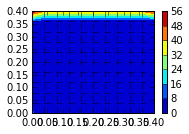

[[ 9.09  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 54.55  40.00  40.00  40.00  40.00  40.00  40.00  40.00  40.00  40.00
   50.00]]


In [3]:
sFVM2DSteady(1)

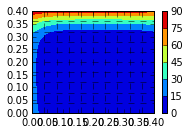

[[ 21.25  8.51  2.90  0.58  0.11  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 19.44  7.74  2.07  0.44  0.02  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 18.97  6.97  1.93  0.30  0.02  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 18.50  6.88  1.79  0.30  0.02  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 18.47  6.79  1.79  0.30  0.02  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 18.43  6.79  1.79  0.30  0.02  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 19.03  6.94  1.95  0.46  0.18  0.16  0.16  0.16  0.16  0.16  0.62]
 [ 21.36  9.21  3.63  2.13  1.86  1.83  1.83  1.83  1.83  2.46  3.08]
 [ 31.39  17.40  12.25  10.32  10.05  10.02  10.02  10.02  10.51  10.94
   13.74]
 [ 51.96  40.76  35.46  34.19  33.78  33.75  33.75  33.93  34.07  35.47
   36.69]
 [ 85.01  80.27  79.26  78.96  78.91  78.89  78.91  78.91  78.96  78.65
   76.64]]


In [4]:
sFVM2DSteady(5)

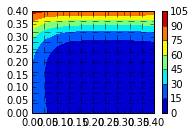

[[ 30.49  16.86  8.06  3.52  1.24  0.41  0.09  0.02  0.00  0.00  0.00]
 [ 29.55  15.65  7.48  2.96  1.06  0.28  0.07  0.01  0.00  0.00  0.00]
 [ 28.63  15.18  6.89  2.77  0.88  0.25  0.05  0.01  0.00  0.01  0.01]
 [ 28.43  14.76  6.77  2.60  0.87  0.24  0.08  0.04  0.05  0.06  0.12]
 [ 28.47  14.95  6.82  2.78  1.03  0.44  0.27  0.25  0.26  0.37  0.48]
 [ 29.77  15.83  7.78  3.61  1.90  1.30  1.15  1.13  1.26  1.40  1.91]
 [ 33.00  19.09  10.65  6.58  4.78  4.20  4.03  4.13  4.24  4.83  5.46]
 [ 40.83  26.29  18.24  13.98  12.32  11.69  11.61  11.64  12.11  12.59
   14.09]
 [ 54.14  40.75  32.93  29.39  27.76  27.29  27.15  27.37  27.57  28.48
   29.47]
 [ 73.88  62.57  57.28  54.71  53.78  53.41  53.39  53.40  53.65  53.66
   53.98]
 [ 94.45  90.40  89.54  89.35  89.31  89.31  89.30  89.27  89.13  88.40
   84.62]]


In [5]:
sFVM2DSteady(10)

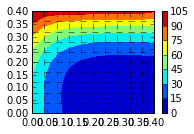

[[ 44.23  29.30  18.17  10.74  5.86  3.08  1.49  0.74  0.37  0.27  0.26]
 [ 43.64  28.49  17.71  10.23  5.66  2.90  1.49  0.77  0.50  0.40  0.45]
 [ 43.39  28.48  17.53  10.33  5.73  3.18  1.78  1.18  0.92  0.93  1.01]
 [ 44.27  29.07  18.35  11.03  6.64  4.06  2.80  2.20  2.07  2.11  2.39]
 [ 46.28  31.22  20.29  13.19  8.72  6.30  5.03  4.57  4.44  4.69  5.03]
 [ 50.55  35.20  24.52  17.33  13.09  10.64  9.52  9.03  9.11  9.35  10.03]
 [ 57.26  42.24  31.56  24.80  20.60  18.41  17.27  16.97  16.96  17.46
   18.10]
 [ 67.25  52.45  42.62  36.23  32.60  30.54  29.65  29.27  29.42  29.69
   30.51]
 [ 79.57  66.19  57.56  52.48  49.47  47.97  47.19  46.97  46.87  47.03
   47.26]
 [ 92.63  81.92  76.19  72.98  71.30  70.39  70.00  69.76  69.60  69.06
   68.11]
 [ 101.70  97.81  96.99  96.82  96.78  96.77  96.76  96.72  96.51  95.50
   90.54]]


In [6]:
sFVM2DSteady(20)